In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k"})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0,
                            "font.family":"Helvetica", "axes.labelsize":24.,"xtick.labelsize":24.,
                            "ytick.labelsize":24., "legend.fontsize":20.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("bright", 12) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0)]

In [2]:
# This function determines the k-path length for band structures ######################
# kpoints : a list of the k-points sampled on the k-path. The k-vectors will be determined from this
# POSCAR : the path to the POSCAR file type for this band structure. The simulation cell is taken from this file.
def k_path_dft(kpoints, POSCAR, num_kpts): # poscar is path to output file (./POSCAR)
    kvectors = []
    for i in range(0,len(kpoints)-1):
        vector = [kpoints[i+1][0]-kpoints[i][0], kpoints[i+1][1]-kpoints[i][1], kpoints[i+1][2]-kpoints[i][2]]
        kvectors.append(vector)
   
    simulation_cell = pd.read_csv(POSCAR, header=None, delim_whitespace=True, skiprows=[0,1], nrows=3)
   
    klength = []
    for i in range(0,len(kvectors)): # norm of dot prod of kpoints (to change scale)
        distance = np.linalg.norm(np.dot(kvectors[i], simulation_cell))
        klength.append(np.pi/distance)
       
    kpath = np.linspace(0, np.sum(klength), num_kpts) # num_kpts is total num of kpoints (x per band)
    return kpath
#This function determines the locations of the kvectors in the KPATH vector(generated above)
def location_kpts_dft(kpoints, bands): # input vector of KPOINTS and REFORMATTED_BANDS.dat variable
    num_elem = int(len(bands[:,0])/(len(kpoints)-1)) # equal to the number of pts per vector, 80 in this case
    location_kpts = [0,num_elem-1]
    for i in range(1,len(kpoints)-1):
        location_kpts.append(location_kpts[i]+num_elem)
    return location_kpts

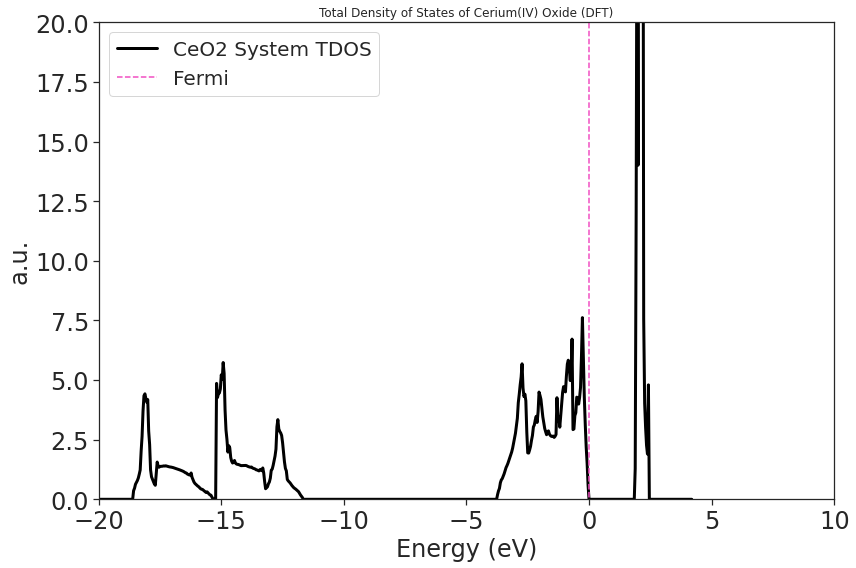

In [60]:
# density of state
# get vals
TDOSDFT = np.array(np.loadtxt('./CeO2/DFT/3-DOS/TDOS.dat'))
fermiDFT = 0.02349 #-6.381170  #set at upper edge of valence
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='CeO2 System TDOS')
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-20,10)
plt.ylim(-0,20)
plt.legend()
plt.title('Total Density of States of Cerium(IV) Oxide (DFT)')
plt.savefig('./figures/CeO2-TDOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

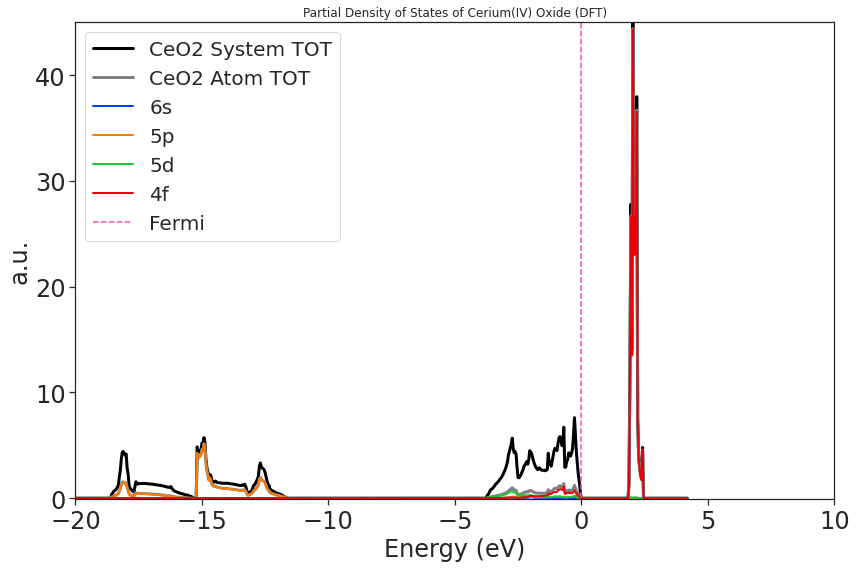

In [23]:
# partial density of state
# get vals
PDOSDFT_Ce = np.array(np.loadtxt('./CeO2/DFT/3-DOS/PDOS_Ce.dat'))
PDOSDFT_O = np.array(np.loadtxt('./CeO2/DFT/3-DOS/PDOS_O.dat'))
fermiDFT = 0.02349
# plot PDOS
fig2 = plt.figure(figsize=(12,8))
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='CeO2 System TOT')
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
#plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe DOS DFT')
plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,17], color='grey',lw=3, label='CeO2 Atom TOT') # about 2/3 of system tot, why?
plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,1], color=colors[0], lw=2, label='6s')
plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,2]+PDOSDFT_Ce[:,3]+PDOSDFT_Ce[:,4], color=colors[1],linestyle='solid',lw=2, label='5p')
plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,5]+PDOSDFT_Ce[:,6]+PDOSDFT_Ce[:,7]+PDOSDFT_Ce[:,8]+PDOSDFT_Ce[:,9], color=colors[2],lw=2, label='5d') # 0
plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,10]+PDOSDFT_Ce[:,11]+PDOSDFT_Ce[:,12]+PDOSDFT_Ce[:,13]+PDOSDFT_Ce[:,14]+PDOSDFT_Ce[:,15]+PDOSDFT_Ce[:,16], color=colors[3],lw=2, label='4f') # 0
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-20,10)
plt.ylim(-0.1,45)
plt.legend()
plt.title('Partial Density of States of Cerium(IV) Oxide (DFT)')
plt.savefig('./figures/CeO2-PDOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

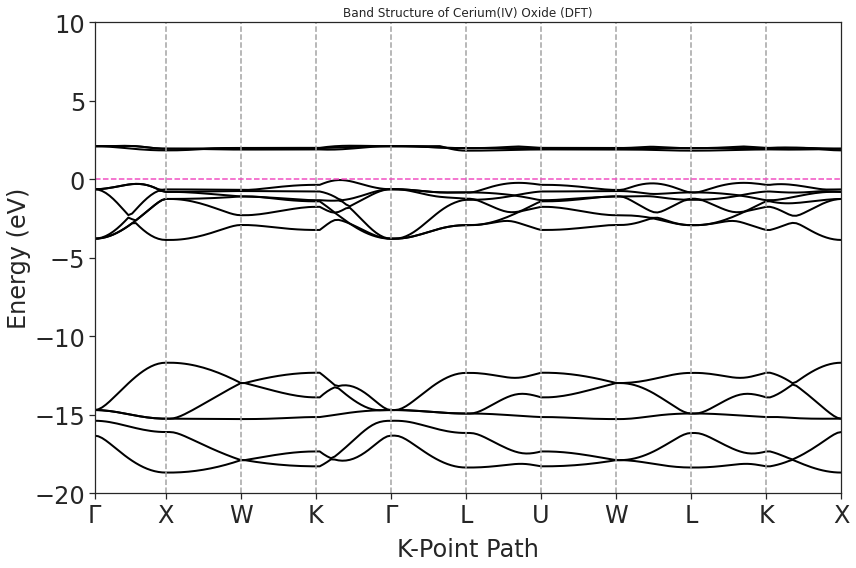

In [30]:
# Band Structure
# GAMMA X W K GAMMA L U W L K X
KPOINTS = [[0,0,0],[0.5,0,0.5],[0.5,0.25,0.75],[0.375,0.375,0.75],[0,0,0],[0.5,0.5,0.5],[0.625,0.25,0.625],[0.5,0.25,0.75],[0.5,0.5,0.5],[0.375,0.375,0.75],[0.5,0,0.5]] # copied from KPOINTS

fermiDFT = 0.02349
BANDS_DFT = np.array(np.loadtxt("./CeO2/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./CeO2/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############
#print('shape', np.shape(Bands_Xe_DFT)) 

############# v plot Band Struct
fig3 = plt.figure(figsize=(12,8))
plt.plot(KPATH_DFT, BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =

kpts = KPATH_DFT[location_kpts_dft(KPOINTS, BANDS_DFT)] # generate kpts using a function instead of manual inputs
plt.xticks(kpts,['\u0393','X','W','K','\u0393','L','U','W','L','K','X'])
plt.vlines(kpts[1:10],-20,20,color=colors[7],linestyle='dashed')
plt.hlines(0,KPATH_DFT[0],KPATH_DFT[-1],color=colors[6],linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(KPATH_DFT[0],KPATH_DFT[-1])
plt.ylim(-20,10)
plt.title('Band Structure of Cerium(IV) Oxide (DFT)')
plt.savefig('./figures/CeO2-BS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

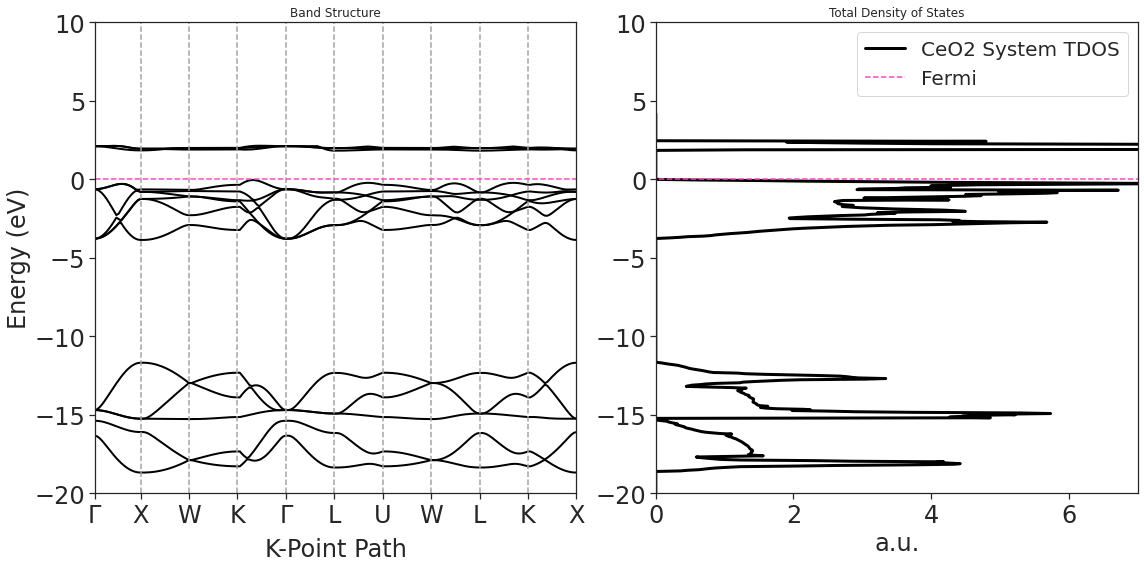

In [59]:
# All in one (DOS+BS)
TDOSDFT = np.array(np.loadtxt('./CeO2/DFT/3-DOS/TDOS.dat'))
BANDS_DFT = np.array(np.loadtxt("./CeO2/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./CeO2/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
fermiDFT = 0.02349 #-6.381170  #set at upper edge of valence

fig5 = plt.figure(figsize=(16,8))

# plot Band Struct
bs = plt.subplot(121)
KPOINTS = [[0,0,0],[0.5,0,0.5],[0.5,0.25,0.75],[0.375,0.375,0.75],[0,0,0],[0.5,0.5,0.5],[0.625,0.25,0.625],[0.5,0.25,0.75],[0.5,0.5,0.5],[0.375,0.375,0.75],[0.5,0,0.5]] # copied from KPOINTS
kpts = KPATH_DFT[location_kpts_dft(KPOINTS, BANDS_DFT)] # generate kpts using a function instead of manual inputs

plt.plot(KPATH_DFT, BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.xticks(kpts,['\u0393','X','W','K','\u0393','L','U','W','L','K','X'])
plt.vlines(kpts[1:10],-20,20,color=colors[7],linestyle='dashed')
plt.hlines(0,KPATH_DFT[0],KPATH_DFT[-1],color=colors[6],linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(KPATH_DFT[0],KPATH_DFT[-1])
plt.ylim(-20,10)
plt.title('Band Structure')

# plot TDOS
dos = plt.subplot(122)
plt.plot( TDOSDFT[:,1], TDOSDFT[:,0]-fermiDFT, color='k',lw=3, label='CeO2 System TDOS')
plt.hlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
#plt.ylabel('Energy (eV)')
plt.xlabel('a.u.')
plt.ylim(-20,10)
plt.xlim(-0,7)
plt.legend()
plt.title('Total Density of States')

plt.savefig('./figures/CeO2-ALL-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

GFN1

In [ ]:
# density of state
# get vals
TDOSDFT = np.array(np.loadtxt('./CeO2/GFN1/3-DOS/TDOS.dat'))
fermiDFT = 0.02349 #-6.381170  #set at upper edge of valence
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='CeO2 System TDOS')
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-20,10)
plt.ylim(-0,20)
plt.legend()
plt.title('Total Density of States of Cerium(IV) Oxide (DFT)')
plt.savefig('./figures/CeO2-TDOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()